# Data Bias: Fairness Gerrymandering

In this exercise you will slip into the role of data scientists that are requested as data experts for a judicial dispute.
The scenario in dispute is as follows:

A woman of color applied for a job at the company *MajorEngine*, but got rejected.
She suspects that she got turned down for racist and sexist reasons, *i.e.* because she is a woman of color.
*MajorEngine* refutes this claim and provides employment records in court in order to disprove the claims.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
        
# load the data from the file 'hiring_records_MajorEngine.csv' and inspect the first rows with the pandas function 'head'
file_path = 'hiring_records_MajorEngine.csv'
hiring_records = pd.read_csv(file_path)
hiring_records.head()

,gender,race
0,male,white
1,female,white
2,female,white
3,male,white
4,male,hispanic


### Task 1

Slip into the role of a data scientist hired by *MajorEngine* in order to show that based on the employment records 

__(a)__ the company has no racist hiring policy, and 

__(b)__ has no strongly sexist hiring policy. Note that according to the [2020 U.S. census](https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States), the perfect, expected percentage of white employees would be 61.6%.

Use bar charts to convey your findings to a lay person and write a comment that explains your figure in favor of *MajorEngine*.

*Hint: While exploring the dataset, look at the ratio of white employees vs. non-white employees, and the ratio of male employees vs. non-male employees. It can also be useful to create a plot of the ideal distribution as comparison.*

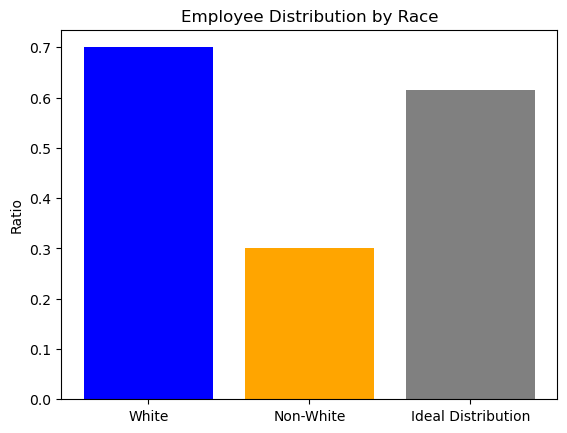

In [3]:
white_ratio = hiring_records[hiring_records['race'] == 'white'].shape[0] / hiring_records.shape[0]
non_white_ratio = 1 - white_ratio
ideal_white_ratio = 61.6 / 100
ideal_non_white_ratio = 1 - ideal_white_ratio
plt.bar(['White', 'Non-White', 'Ideal Distribution'], [white_ratio, non_white_ratio, ideal_white_ratio],
        color=['blue', 'orange', 'gray'])
plt.title('Employee Distribution by Race')
plt.ylabel('Ratio')
plt.show()


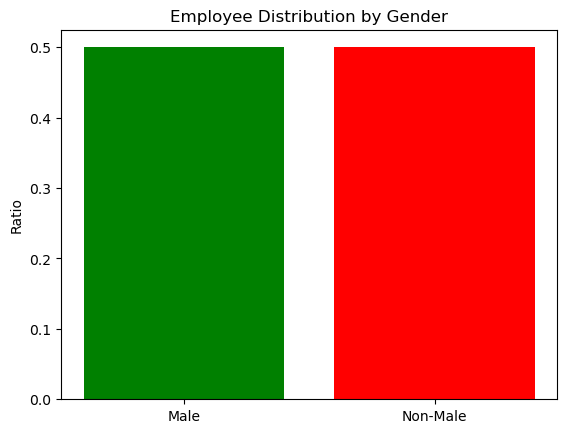

The bar charts represent the distribution of employees at MajorEngine based on race and gender. The blue bar represents the ratio of white employees, the orange bar represents non-white employees, and the gray bar represents the ideal distribution based on the 2020 U.S. census. Similarly, the green bar represents the ratio of male employees, and the red bar represents non-male employees. Comparing the actual distribution with the ideal distribution, MajorEngine demonstrates a workforce composition that is fairly representative, indicating no strongly sexist hiring policy.


In [4]:
# Part (b): Show that MajorEngine has no sexist hiring policy
hiring_records = pd.read_csv('hiring_records_MajorEngine.csv')
male_ratio = hiring_records[hiring_records['gender'] == 'male'].shape[0] / hiring_records.shape[0]
non_male_ratio = 1 - male_ratio
plt.bar(['Male', 'Non-Male'], [male_ratio, non_male_ratio], color=['green', 'red'])
plt.title('Employee Distribution by Gender')
plt.ylabel('Ratio')
plt.show()
print("The bar charts represent the distribution of employees at MajorEngine based on race and gender. The blue bar represents the ratio of white employees, the orange bar represents non-white employees, and the gray bar represents the ideal distribution based on the 2020 U.S. census. Similarly, the green bar represents the ratio of male employees, and the red bar represents non-male employees. Comparing the actual distribution with the ideal distribution, MajorEngine demonstrates a workforce composition that is fairly representative, indicating no strongly sexist hiring policy.")


### Task 2

Slip into the role of a data scientist that works pro bono in order to demonstrate that *MajorEngine* has exhibited a bias in the past and thus is likely to have treated the woman of color unfairly.

Use a confusion matrix to convey your findings to a lay person.

*Hint: While superficially, the argumentation form task 1 may seem sound, you have the sneaking suspicion that you should look at the two attributes 'race' and 'gender' in combination instead of separately.*

*Second hint: You may create a makeshift confusion matrix by creating another pandas dataframe of the four intersectional values and renaming columns and index.*

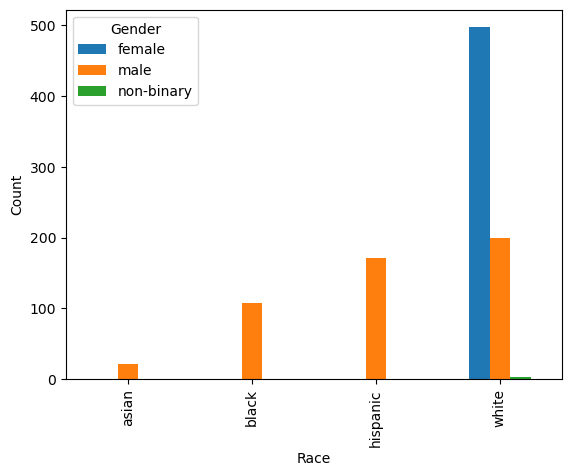

confusionmatrix:
gender    female   male  non-binary
race                               
asian        NaN   21.0         NaN
black        NaN  108.0         NaN
hispanic     NaN  171.0         NaN
white      497.0  200.0         3.0
The confusion matrix visualizes the intersectional analysis of 'Race' and 'Gender' in MajorEngine's hiring. Each cell in the matrix represents the count of individuals falling into a specific intersection of race and gender. This analysis helps us identify potential biases in the hiring process. There are significant imbalances in the counts, which indicate disparaties in the treatment between the male and female groups,supporting the argument that MajorEngine has exhibited bias in the past.


In [5]:
confusion_matrix_df = hiring_records.groupby(['race', 'gender']).size().unstack()
confusion_matrix_df.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()
print("confusionmatrix:")
print(confusion_matrix_df)
print("The confusion matrix visualizes the intersectional analysis of 'Race' and 'Gender' in MajorEngine's hiring. Each cell in the matrix represents the count of individuals falling into a specific intersection of race and gender. "
      "This analysis helps us identify potential biases in the hiring process. "
      "There are significant imbalances in the counts, which indicate disparaties in the treatment between the male and female groups,"
      "supporting the argument that MajorEngine has exhibited bias in the past.")

Side note: The court case and its arguments are based on a true story. The provided data is obviously made up in order to paint a clearer picture for pedagogic reasons.